In [ ]:
!pip install neattext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 114 kB 5.1 MB/s 


In [ ]:
# Load EDA Pkgs
import pandas as pd
import numpy as np


# Load Data Viz Pkgs
import seaborn as sns


# Load Text Cleaning Pkgs
import neattext.functions as nfx

# Load ML Pkgs
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Hackatho_CDAC/Suicide_new_data.xlsx")
df

,drop_column,text,emotion
0,2,Ex Wife Threatening DepressionRecently I left ...,Depression
1,3,Am I weird I don't get affected by compliments...,non-Depression
2,4,Finally 2020 is almost over... So I can never ...,non-Depression
3,8,i need helpjust help me im crying so hard,Depression
4,9,"Iâ€™m so lostHello, my name is Adam (16) and I...",Depression
...,...,...,...
232040,348103,If you don't like rock then your not going to ...,non-Depression
232041,348106,You how you can tell i have so many friends an...,non-Depression
232042,348107,pee probably tastes like salty teaðŸ˜ðŸ’¦â€¼ï...,non-Depression
232043,348108,The usual stuff you find hereI'm not posting t...,Depression


In [ ]:
df.head()

,drop_column,text,emotion
0,2,Ex Wife Threatening DepressionRecently I left ...,Depression
1,3,Am I weird I don't get affected by compliments...,non-Depression
2,4,Finally 2020 is almost over... So I can never ...,non-Depression
3,8,i need helpjust help me im crying so hard,Depression
4,9,"Iâ€™m so lostHello, my name is Adam (16) and I...",Depression


In [ ]:
df.describe()

,drop_column,text,emotion
count,232045,232040,232045
unique,232045,232040,2
top,2,Ex Wife Threatening DepressionRecently I left ...,Depression
freq,1,1,116033


In [ ]:
df = df.drop(['drop_column'],axis = 1)

In [ ]:
df

,text,emotion
0,Ex Wife Threatening DepressionRecently I left ...,Depression
1,Am I weird I don't get affected by compliments...,non-Depression
2,Finally 2020 is almost over... So I can never ...,non-Depression
3,i need helpjust help me im crying so hard,Depression
4,"Iâ€™m so lostHello, my name is Adam (16) and I...",Depression
...,...,...
232040,If you don't like rock then your not going to ...,non-Depression
232041,You how you can tell i have so many friends an...,non-Depression
232042,pee probably tastes like salty teaðŸ˜ðŸ’¦â€¼ï...,non-Depression
232043,The usual stuff you find hereI'm not posting t...,Depression


In [ ]:
df['emotion'].value_counts()

Depression        116033
non-Depression    116012
Name: emotion, dtype: int64

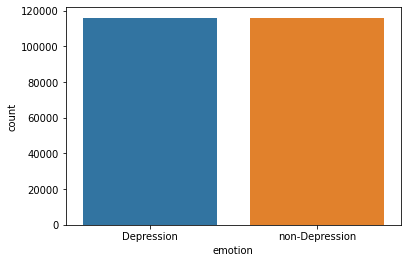

In [ ]:
#plot 
sns.countplot(x='emotion',data=df)

In [ ]:
# Data Cleaning
dir(nfx)

In [ ]:
df['clean_text'] = df['text'].apply(nfx.remove_userhandles)

In [ ]:
# Stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [ ]:
df

,text,emotion
0,Ex Wife Threatening DepressionRecently I left ...,Depression
1,Am I weird I don't get affected by compliments...,non-Depression
2,Finally 2020 is almost over... So I can never ...,non-Depression
3,i need helpjust help me im crying so hard,Depression
4,"Iâ€™m so lostHello, my name is Adam (16) and I...",Depression
...,...,...
232040,If you don't like rock then your not going to ...,non-Depression
232041,You how you can tell i have so many friends an...,non-Depression
232042,pee probably tastes like salty teaðŸ˜ðŸ’¦â€¼ï...,non-Depression
232043,The usual stuff you find hereI'm not posting t...,Depression


In [ ]:
df['text'] = df['text'].astype('unicode')

In [ ]:
# Features & Labels
Xfeatures = df['text']
ylabels = df['emotion']

In [ ]:
#  Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [ ]:
# Build Pipeline
from sklearn.pipeline import Pipeline

In [ ]:
# LogisticRegression Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [ ]:
# Train and Fit Data
pipe_lr.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [ ]:
pipe_lr


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [ ]:
# Check Accuracy
pipe_lr.score(x_test,y_test) * 100

93.14362053609906

In [ ]:
# Make A Prediction
ex1 = "every person enters your life to just leave the point beign how long are they gonna stay"

In [ ]:
k = pipe_lr.predict([ex1])
k[0]

'non-Depression'

In [ ]:
# Prediction Prob
pipe_lr.predict_proba([ex1])

array([[0.06776547, 0.93223453]])

In [ ]:
# To Know the classes
pipe_lr.classes_

array(['Depression', 'non-Depression'], dtype=object)

In [ ]:
# Save Model & Pipeline
import joblib
pipeline_file = open("emotion_classifier_pipe_lr_03_june_2021.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()

In [ ]:
joblib.dump(pipe_lr,'model')

['model']

In [ ]:
!pip install streamlit --quiet

     |████████████████████████████████| 9.1 MB 6.3 MB/s 
     |████████████████████████████████| 4.3 MB 20.3 MB/s 
     |████████████████████████████████| 111 kB 53.6 MB/s 
     |████████████████████████████████| 78 kB 2.2 MB/s 
     |████████████████████████████████| 232 kB 46.9 MB/s 
     |████████████████████████████████| 164 kB 15.4 MB/s 
     |████████████████████████████████| 181 kB 45.1 MB/s 
     |████████████████████████████████| 63 kB 611 kB/s 
     |████████████████████████████████| 133 kB 18.1 MB/s 
     |████████████████████████████████| 793 kB 48.4 MB/s 
     |████████████████████████████████| 132 kB 12.2 MB/s 
     |████████████████████████████████| 428 kB 31.5 MB/s 
     |████████████████████████████████| 381 kB 42.9 MB/s 
     |████████████████████████████████| 51 kB 6.0 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nbclient 0.6.4 requi

In [ ]:
%%writefile app.py
import streamlit as st 
import joblib
model = joblib.load('/content/model')
st.title('User emotion detection application backend [ working implementation]')
ip = st.text_input("Users message")
op = model.predict([ip])
if st.button("Analyse"):
  st.title(op[0])

Writing app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

2022-06-11 15:59:29.788 INFO    numexpr.utils: NumExpr defaulting to 2 threads.
npx: installed 22 in 5.15s
your url is: https://tasty-jeans-poke-104-196-51-32.loca.lt

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://104.196.51.32:8501

  Stopping...
^C
